# Storytelling Data Visualisation on Exchange Rates

## Introduction

The dataset we're using describes Euro daily exchange rates between 1999 and 2021. The euro (symbolised wth €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chamkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) - the data source is the European Central Bank. Note the dataset gets regular updates - we downloaded it on January 2021.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read csv file and assign to variable
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
# print first five rows
print(exchange_rates.head(5))

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [2]:
# print last five rows
print(exchange_rates.tail(5))

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
5694   1999-01-08               1.8406              NaN               NaN   
5695   1999-01-07               1.8474              NaN               NaN   
5696   1999-01-06               1.8820              NaN               NaN   
5697   1999-01-05               1.8944              NaN               NaN   
5698   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
5694             1.7643         1.6138                      NaN   
5695             1.7602         1.6165                      NaN   
5696             1.7711         1.6116                      NaN   
5697             1.7965         1.6123                      NaN   
5698             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
5694          0.58187          34.938          7.4433  .

In [3]:
# display dataframe info
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

The dataset has 5699 columns and 41 rows with no null values, and most rows being `object` data types with the exception of three, namely `[Turkish lira]`, `[Romanian leu]` and `[Iceland krona]` being of the `float64` data type.

## Data Cleaning

Below, we do the following:
- We rename the `[US dollar]` and `Period\Unit:` columns to something easier to type — `US_dollar` and `Time`.
- We change the `Time` column to a `datetime` data type.
- We sort the values b `Time` in ascending order.
- We reset the index (and drop the initial index).

In [4]:
# rename column names and assign them back to variable
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)

# convert 'Time' column to a datetime data type
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
# sort values by 'Time' in ascending order
exchange_rates.sort_values('Time', inplace=True)
# reset the index and drop the initial index
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
# isolate columns and assign them to a variable
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

In [6]:
# display all unique values along with frequencies
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
1.4617     1
1.1606     1
1.3023     1
1.3221     1
1.1688     1
Name: US_dollar, Length: 3528, dtype: int64

There are 62 `-` values and we shall get rid of them.

In [7]:
# omit '-' values
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# print value counts to show omission
print(euro_to_dollar['US_dollar'].value_counts())

1.2276    9
1.1215    8
1.1305    7
1.1218    6
1.3532    6
         ..
1.1606    1
1.3023    1
1.3221    1
1.0763    1
1.1270    1
Name: US_dollar, Length: 3527, dtype: int64


In [8]:
# convert column to float type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

## Rolling Mean

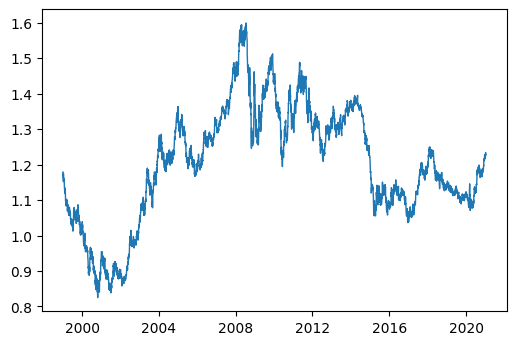

In [9]:
# plot US_dollar column against Time column
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'], linewidth=1)
plt.show()

If we look at the line's shape, we see many small wiggles rather than seeing a smooth line. The wiggles, however, have meaning: they are visual representation of the daily variation in exchange rate. The rate only shows clear upward or downward trends in the longer run (months or years). As we do not want to show the daily variation on our graph. To hide it and show only the long-term trends, we can use the *rolling mean* (also known as the moving average).

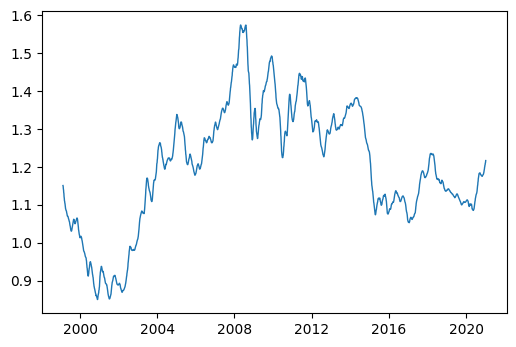

In [10]:
# create rolling mean column
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

# plot rolling mean column against time column
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'], linewidth=1)
plt.show()

We shall now see visually how the euro-dollar rate changed during the 2007-2008 financial crisis. We shall be using a line plot and see what has changed from 2006, i.e. before the crisis to 2009 which is after the crisis.

In [11]:
# define required time frame
fin_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) &
                                   (euro_to_dollar['Time'].dt.year <= 2009)]
# define recession time frame
fin_crisis_7_to_9 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007) &
                                          (euro_to_dollar['Time'].dt.year <= 2008)]

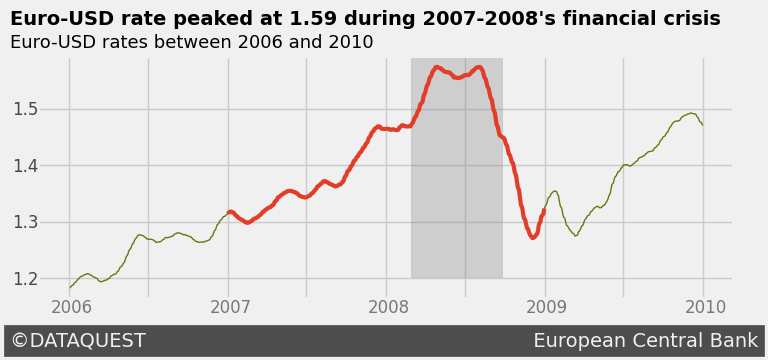

In [100]:
# import style submodule
import matplotlib.style as style

# add fivethirtyeight style
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,3))
# plot line graph using required time frame
ax.plot(fin_crisis['Time'], fin_crisis['rolling_mean'], 
        color='#6E750E',
        linewidth=1
       )
# plot line graph using recession time frame
ax.plot(fin_crisis_7_to_9['Time'], 
        fin_crisis_7_to_9['rolling_mean'], 
        color='#e23d28', 
        linewidth=3
       )

# highlight recession peak
ax.axvspan(xmin=733100, xmax=733310, ymin=0.09, alpha=0.3, color='grey')

# erase xticklabels and yticklabels
ax.set_xticklabels([])
ax.set_yticklabels([])

# assign new xticklabels
x = 732270.
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.14, year, alpha=0.5, fontsize=12)
    x += 365
    
# assign new yticklabels
y = 1.19
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732180, y, rate, alpha=0.7, fontsize=12)
    y += 0.1
    
# write plot heading
ax.text(732175, 1.65, s="Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", 
        weight='bold')   
# write plot sub-heading
ax.text(732175, 1.61, s="Euro-USD rates between 2006 and 2010", 
        fontsize=13)

# add signature
ax.text(732175, 1.08, s='©DATAQUEST' + ' '*62 + 'European Central Bank', 
        color='#f0f0f0', backgroundcolor='#4d4d4d'
       )
    
plt.show()